In [1]:
import subprocess
import os
from oct2py import octave

In [2]:
current_path = os.getcwd()
path2add = current_path + "/octave-tests/"
print(current_path)
print(path2add)

if os.path.exists(path2add):
    octave.addpath(path2add)
    print("Path correctly added to octave instance.")
else:
    print("The path is not available")

/home/macu/work/nbs_pipeline
/home/macu/work/nbs_pipeline/octave-tests/

Path correctly added to octave instance.


In [3]:
print(octave.cd(path2add))
octave.source("hola_mundo.m")




/home/macu/work/nbs_pipeline



Hola Mundo


In [4]:
print("---> Python is here")
print(os.getcwd())
print("---> Console too!")
! pwd

---> Python is here
/home/macu/work/nbs_pipeline
---> Console too!
/home/macu/work/nbs_pipeline


In [5]:
filename = 'interactiveMatrixProfileVer3'
! ls octave-tests/{filename}.m

octave-tests/interactiveMatrixProfileVer3.m


In [6]:
filename = 'MP_first_test_penguin_sample.mat'

In [7]:
## -- Classes & types
from dataclasses import dataclass, field
from typing import List
import warnings 

In [8]:
@dataclass
class MatlabMatrix: 
    filename : str = ""
    matname : str = ""
    data : List [ float ] = None
    data_dict : dict = field (default_factory = dict)
    smoothing_window_len : int = None
    
    def load(self, numcol : int, print_flag : bool = False):
        self.dict = octave.load(self.filename)
        data = self.dict[self.matname]
        if print_flag: print(data.dtype)
        self.data = np.array(data[:,numcol])
        return self.data
    def smooth(self, window_len=11, print_flag = False):
        # window_len: smoothing window size needs, which must be odd number,
        # Step 1: Apply the moving average to the main part of the data using convolution
        self.smoothing_window_len = window_len
        if self.smoothing_window_len % 2 == 0:
            warnings.warn("Window len must be odd! Adding 1 to your length.")
            self.smoothing_window_len += 1
        if print_flag: print("---> About to get out0")
        out0 = np.convolve(
            self.data, 
            np.ones(self.smoothing_window_len, dtype=int),
            'valid'
        ) / self.smoothing_window_len
    
        # Step 2: Handle the beginning of the array (start)
        # Use cumulative sum and then average it by the increasing window size
    
        if print_flag : 
            print("out0 ~", out0.shape)
            print("---> About to get start")
    
        r = np.arange(1, self.smoothing_window_len-1, 2)
    
        if print_flag: print("r", r)
    
        start = np.cumsum(self.data[:self.smoothing_window_len-1])[::2] / r
    
        if print_flag:
            print("start", start)
            print("---> About to get stop")
    
        # Step 3: Handle the end of the array (stop)
        # Reverse the array, use cumulative sum, and then average it by the increasing window size
    
        stop = (np.cumsum(self.data[:-self.smoothing_window_len:-1])[::2] / r)[::-1]

        if print_flag: 
            print("stop", stop)
    
        # Step 4: Combine the start, middle, and end parts together
        return np.concatenate((start, out0, stop))



In [9]:
import numpy as np
import oct2py

In [10]:
penguins_sample = MatlabMatrix(filename = 'MP_first_test_penguin_sample', matname = 'penguin_sample')
penguins_sample.load( numcol = 0, print_flag = True )




float64


array([0.253906 , 0.259033 , 0.269287 , ..., 0.0559082, 0.064209 ,
       0.059082 ])

In [11]:
subsequence_len = 800

In [12]:
%load_ext oct2py.ipython

In [13]:
%%octave -f svg
t = linspace(-10, 10, 1000)

t =

 Columns 1 through 6:

  -1.0000e+01  -9.9800e+00  -9.9600e+00  -9.9399e+00  -9.9199e+00  -9.8999e+00

 Columns 7 through 12:

  -9.8799e+00  -9.8599e+00  -9.8398e+00  -9.8198e+00  -9.7998e+00  -9.7798e+00

 Columns 13 through 18:

  -9.7598e+00  -9.7397e+00  -9.7197e+00  -9.6997e+00  -9.6797e+00  -9.6597e+00

 Columns 19 through 24:

  -9.6396e+00  -9.6196e+00  -9.5996e+00  -9.5796e+00  -9.5596e+00  -9.5395e+00

 Columns 25 through 30:

  -9.5195e+00  -9.4995e+00  -9.4795e+00  -9.4595e+00  -9.4394e+00  -9.4194e+00

 Columns 31 through 36:

  -9.3994e+00  -9.3794e+00  -9.3594e+00  -9.3393e+00  -9.3193e+00  -9.2993e+00

 Columns 37 through 42:

  -9.2793e+00  -9.2593e+00  -9.2392e+00  -9.2192e+00  -9.1992e+00  -9.1792e+00

 Columns 43 through 48:

  -9.1592e+00  -9.1391e+00  -9.1191e+00  -9.0991e+00  -9.0791e+00  -9.0591e+00

 Columns 49 through 54:

  -9.0390e+00  -9.0190e+00  -8.9990e+00  -8.9790e+00  -8.9590e+00  -8.9389e+00

 Columns 55 through 60:

  -8.9189e+00  -8.8989e+00  -8.8789e+00  -8.8589e+00  -8.8388e+00  -8.8188e+00

 Columns 61 through 66:

  -8.7988e+00  -8.7788e+00  -8.7588e+00  -8.7387e+00  -8.7187e+00  -8.6987e+00

 Columns 67 through 72:

  -8.6787e+00  -8.6587e+00  -8.6386e+00  -8.6186e+00  -8.5986e+00  -8.5786e+00

 Columns 73 through 78:

  -8.5586e+00  -8.5385e+00  -8.5185e+00  -8.4985e+00  -8.4785e+00  -8.4585e+00

 Columns 79 through 84:

  -8.4384e+00  -8.4184e+00  -8.3984e+00  -8.3784e+00  -8.3584e+00  -8.3383e+00

 Columns 85 through 90:

  -8.3183e+00  -8.2983e+00  -8.2783e+00  -8.2583e+00  -8.2382e+00  -8.2182e+00

 Columns 91 through 96:

  -8.1982e+00  -8.1782e+00  -8.1582e+00  -8.1381e+00  -8.1181e+00  -8.0981e+00

 Columns 97 through 102:

  -8.0781e+00  -8.0581e+00  -8.0380e+00  -8.0180e+00  -7.9980e+00  -7.9780e+00

 Columns 103 through 108:

  -7.9580e+00  -7.9379e+00  -7.9179e+00  -7.8979e+00  -7.8779e+00  -7.8579e+00

 Columns 109 through 114:

  -7.8378e+00  -7.8178e+00  -7.7978e+00  -7.7778e+00  -7.7578e+00  -7.7377e+00

 Columns 115 through 120:

  -7.7177e+00  -7.6977e+00  -7.6777e+00  -7.6577e+00  -7.6376e+00  -7.6176e+00

 Columns 121 through 126:

  -7.5976e+00  -7.5776e+00  -7.5576e+00  -7.5375e+00  -7.5175e+00  -7.4975e+00

 Columns 127 through 132:

  -7.4775e+00  -7.4575e+00  -7.4374e+00  -7.4174e+00  -7.3974e+00  -7.3774e+00

 Columns 133 through 138:

  -7.3574e+00  -7.3373e+00  -7.3173e+00  -7.2973e+00  -7.2773e+00  -7.2573e+00

 Columns 139 through 144:

  -7.2372e+00  -7.2172e+00  -7.1972e+00  -7.1772e+00  -7.1572e+00  -7.1371e+00

 Columns 145 through 150:

  -7.1171e+00  -7.0971e+00  -7.0771e+00  -7.0571e+00  -7.0370e+00  -7.0170e+00

 Columns 151 through 156:

  -6.9970e+00  -6.9770e+00  -6.9570e+00  -6.9369e+00  -6.9169e+00  -6.8969e+00

 Columns 157 through 162:

  -6.8769e+00  -6.8569e+00  -6.8368e+00  -6.8168e+00  -6.7968e+00  -6.7768e+00

 Columns 163 through 168:

  -6.7568e+00  -6.7367e+00  -6.7167e+00  -6.6967e+00  -6.6767e+00  -6.6567e+00

 Columns 169 through 174:

  -6.6366e+00  -6.6166e+00  -6.5966e+00  -6.5766e+00  -6.5566e+00  -6.5365e+00

 Columns 175 through 180:

  -6.5165e+00  -6.4965e+00  -6.4765e+00  -6.4565e+00  -6.4364e+00  -6.4164e+00

 Columns 181 through 186:

  -6.3964e+00  -6.3764e+00  -6.3564e+00  -6.3363e+00  -6.3163e+00  -6.2963e+00

 Columns 187 through 192:

  -6.2763e+00  -6.2563e+00  -6.2362e+00  -6.2162e+00  -6.1962e+00  -6.1762e+00

 Columns 193 through 198:

  -6.1562e+00  -6.1361e+00  -6.1161e+00  -6.0961e+00  -6.0761e+00  -6.0561e+00

 Columns 199 through 204:

  -6.0360e+00  -6.0160e+00  -5.9960e+00  -5.9760e+00  -5.9560e+00  -5.9359e+00

 Columns 205 through 210:

  -5.9159e+00  -5.8959e+00  -5.8759e+00  -5.8559e+00  -5.8358e+00  -5.8158e+00

 Columns 211 through 216:

  -5.7958e+00  -5.7758e+00  -5.7558e+00  -5.7357e+00  -5.7157e+00  -5.6957e+00

 Columns 217 through 222:

  -5.6757e+00  -5.6557e+00  -5.6356e+00  -5.6156e+00  -5.5956e+00  -5.5756e+00

 Columns 223 through 228:

  -5.5556e+00  -5.5355e+00  -5.5155e+00  -5.4955e+00  -5.4755e+00  -5.4555e+00

 Columns 229 through 234:

  -5.4354e+00  -5.4154e+00  -5.3954e+00  -5.3754e+00  -5.3554e+00  -5.3353e+00

 Columns 235 through 240:

  -5.3153e+00  -5.2953e+00  -5.2753e+00  -5.2553e+00  -5.2352e+00  -5.2152e+00

 Columns 241 through 246:

  -5.1952e+00  -5.1752e+00  -5.1552e+00  -5.1351e+00  -5.1151e+00  -5.0951e+00

 Columns 247 through 252:

  -5.0751e+00  -5.0551e+00  -5.0350e+00  -5.0150e+00  -4.9950e+00  -4.9750e+00

 Columns 253 through 258:

  -4.9550e+00  -4.9349e+00  -4.9149e+00  -4.8949e+00  -4.8749e+00  -4.8549e+00

 Columns 259 through 264:

  -4.8348e+00  -4.8148e+00  -4.7948e+00  -4.7748e+00  -4.7548e+00  -4.7347e+00

 Columns 265 through 270:

  -4.7147e+00  -4.6947e+00  -4.6747e+00  -4.6547e+00  -4.6346e+00  -4.6146e+00

 Columns 271 through 276:

  -4.5946e+00  -4.5746e+00  -4.5546e+00  -4.5345e+00  -4.5145e+00  -4.4945e+00

 Columns 277 through 282:

  -4.4745e+00  -4.4545e+00  -4.4344e+00  -4.4144e+00  -4.3944e+00  -4.3744e+00

 Columns 283 through 288:

  -4.3544e+00  -4.3343e+00  -4.3143e+00  -4.2943e+00  -4.2743e+00  -4.2543e+00

 Columns 289 through 294:

  -4.2342e+00  -4.2142e+00  -4.1942e+00  -4.1742e+00  -4.1542e+00  -4.1341e+00

 Columns 295 through 300:

  -4.1141e+00  -4.0941e+00  -4.0741e+00  -4.0541e+00  -4.0340e+00  -4.0140e+00

 Columns 301 through 306:

  -3.9940e+00  -3.9740e+00  -3.9540e+00  -3.9339e+00  -3.9139e+00  -3.8939e+00

 Columns 307 through 312:

  -3.8739e+00  -3.8539e+00  -3.8338e+00  -3.8138e+00  -3.7938e+00  -3.7738e+00

 Columns 313 through 318:

  -3.7538e+00  -3.7337e+00  -3.7137e+00  -3.6937e+00  -3.6737e+00  -3.6537e+00

 Columns 319 through 324:

  -3.6336e+00  -3.6136e+00  -3.5936e+00  -3.5736e+00  -3.5536e+00  -3.5335e+00

 Columns 325 through 330:

  -3.5135e+00  -3.4935e+00  -3.4735e+00  -3.4535e+00  -3.4334e+00  -3.4134e+00

 Columns 331 through 336:

  -3.3934e+00  -3.3734e+00  -3.3534e+00  -3.3333e+00  -3.3133e+00  -3.2933e+00

 Columns 337 through 342:

  -3.2733e+00  -3.2533e+00  -3.2332e+00  -3.2132e+00  -3.1932e+00  -3.1732e+00

 Columns 343 through 348:

  -3.1532e+00  -3.1331e+00  -3.1131e+00  -3.0931e+00  -3.0731e+00  -3.0531e+00

 Columns 349 through 354:

  -3.0330e+00  -3.0130e+00  -2.9930e+00  -2.9730e+00  -2.9530e+00  -2.9329e+00

 Columns 355 through 360:

  -2.9129e+00  -2.8929e+00  -2.8729e+00  -2.8529e+00  -2.8328e+00  -2.8128e+00

 Columns 361 through 366:

  -2.7928e+00  -2.7728e+00  -2.7528e+00  -2.7327e+00  -2.7127e+00  -2.6927e+00

 Columns 367 through 372:

  -2.6727e+00  -2.6527e+00  -2.6326e+00  -2.6126e+00  -2.5926e+00  -2.5726e+00

 Columns 373 through 378:

  -2.5526e+00  -2.5325e+00  -2.5125e+00  -2.4925e+00  -2.4725e+00  -2.4525e+00

 Columns 379 through 384:

  -2.4324e+00  -2.4124e+00  -2.3924e+00  -2.3724e+00  -2.3524e+00  -2.3323e+00

 Columns 385 through 390:

  -2.3123e+00  -2.2923e+00  -2.2723e+00  -2.2523e+00  -2.2322e+00  -2.2122e+00

 Columns 391 through 396:

  -2.1922e+00  -2.1722e+00  -2.1522e+00  -2.1321e+00  -2.1121e+00  -2.0921e+00

 Columns 397 through 402:

  -2.0721e+00  -2.0521e+00  -2.0320e+00  -2.0120e+00  -1.9920e+00  -1.9720e+00

 Columns 403 through 408:

  -1.9520e+00  -1.9319e+00  -1.9119e+00  -1.8919e+00  -1.8719e+00  -1.8519e+00

 Columns 409 through 414:

  -1.8318e+00  -1.8118e+00  -1.7918e+00  -1.7718e+00  -1.7518e+00  -1.7317e+00

 Columns 415 through 420:

  -1.7117e+00  -1.6917e+00  -1.6717e+00  -1.6517e+00  -1.6316e+00  -1.6116e+00

 Columns 421 through 426:

  -1.5916e+00  -1.5716e+00  -1.5516e+00  -1.5315e+00  -1.5115e+00  -1.4915e+00

 Columns 427 through 432:

  -1.4715e+00  -1.4515e+00  -1.4314e+00  -1.4114e+00  -1.3914e+00  -1.3714e+00

 Columns 433 through 438:

  -1.3514e+00  -1.3313e+00  -1.3113e+00  -1.2913e+00  -1.2713e+00  -1.2513e+00

 Columns 439 through 444:

  -1.2312e+00  -1.2112e+00  -1.1912e+00  -1.1712e+00  -1.1512e+00  -1.1311e+00

 Columns 445 through 450:

  -1.1111e+00  -1.0911e+00  -1.0711e+00  -1.0511e+00  -1.0310e+00  -1.0110e+00

 Columns 451 through 456:

  -9.9099e-01  -9.7097e-01  -9.5095e-01  -9.3093e-01  -9.1091e-01  -8.9089e-01

 Columns 457 through 462:

  -8.7087e-01  -8.5085e-01  -8.3083e-01  -8.1081e-01  -7.9079e-01  -7.7077e-01

 Columns 463 through 468:

  -7.5075e-01  -7.3073e-01  -7.1071e-01  -6.9069e-01  -6.7067e-01  -6.5065e-01

 Columns 469 through 474:

  -6.3063e-01  -6.1061e-01  -5.9059e-01  -5.7057e-01  -5.5055e-01  -5.3053e-01

 Columns 475 through 480:

  -5.1051e-01  -4.9049e-01  -4.7047e-01  -4.5045e-01  -4.3043e-01  -4.1041e-01

 Columns 481 through 486:

  -3.9039e-01  -3.7037e-01  -3.5035e-01  -3.3033e-01  -3.1031e-01  -2.9029e-01

 Columns 487 through 492:

  -2.7027e-01  -2.5025e-01  -2.3023e-01  -2.1021e-01  -1.9019e-01  -1.7017e-01

 Columns 493 through 498:

  -1.5015e-01  -1.3013e-01  -1.1011e-01  -9.0090e-02  -7.0070e-02  -5.0050e-02

 Columns 499 through 504:

  -3.0030e-02  -1.0010e-02   1.0010e-02   3.0030e-02   5.0050e-02   7.0070e-02

 Columns 505 through 510:

   9.0090e-02   1.1011e-01   1.3013e-01   1.5015e-01   1.7017e-01   1.9019e-01

 Columns 511 through 516:

   2.1021e-01   2.3023e-01   2.5025e-01   2.7027e-01   2.9029e-01   3.1031e-01

 Columns 517 through 522:

   3.3033e-01   3.5035e-01   3.7037e-01   3.9039e-01   4.1041e-01   4.3043e-01

 Columns 523 through 528:

   4.5045e-01   4.7047e-01   4.9049e-01   5.1051e-01   5.3053e-01   5.5055e-01

 Columns 529 through 534:

   5.7057e-01   5.9059e-01   6.1061e-01   6.3063e-01   6.5065e-01   6.7067e-01

 Columns 535 through 540:

   6.9069e-01   7.1071e-01   7.3073e-01   7.5075e-01   7.7077e-01   7.9079e-01

 Columns 541 through 546:

   8.1081e-01   8.3083e-01   8.5085e-01   8.7087e-01   8.9089e-01   9.1091e-01

 Columns 547 through 552:

   9.3093e-01   9.5095e-01   9.7097e-01   9.9099e-01   1.0110e+00   1.0310e+00

 Columns 553 through 558:

   1.0511e+00   1.0711e+00   1.0911e+00   1.1111e+00   1.1311e+00   1.1512e+00

 Columns 559 through 564:

   1.1712e+00   1.1912e+00   1.2112e+00   1.2312e+00   1.2513e+00   1.2713e+00

 Columns 565 through 570:

   1.2913e+00   1.3113e+00   1.3313e+00   1.3514e+00   1.3714e+00   1.3914e+00

 Columns 571 through 576:

   1.4114e+00   1.4314e+00   1.4515e+00   1.4715e+00   1.4915e+00   1.5115e+00

 Columns 577 through 582:

   1.5315e+00   1.5516e+00   1.5716e+00   1.5916e+00   1.6116e+00   1.6316e+00

 Columns 583 through 588:

   1.6517e+00   1.6717e+00   1.6917e+00   1.7117e+00   1.7317e+00   1.7518e+00

 Columns 589 through 594:

   1.7718e+00   1.7918e+00   1.8118e+00   1.8318e+00   1.8519e+00   1.8719e+00

 Columns 595 through 600:

   1.8919e+00   1.9119e+00   1.9319e+00   1.9520e+00   1.9720e+00   1.9920e+00

 Columns 601 through 606:

   2.0120e+00   2.0320e+00   2.0521e+00   2.0721e+00   2.0921e+00   2.1121e+00

 Columns 607 through 612:

   2.1321e+00   2.1522e+00   2.1722e+00   2.1922e+00   2.2122e+00   2.2322e+00

 Columns 613 through 618:

   2.2523e+00   2.2723e+00   2.2923e+00   2.3123e+00   2.3323e+00   2.3524e+00

 Columns 619 through 624:

   2.3724e+00   2.3924e+00   2.4124e+00   2.4324e+00   2.4525e+00   2.4725e+00

 Columns 625 through 630:

   2.4925e+00   2.5125e+00   2.5325e+00   2.5526e+00   2.5726e+00   2.5926e+00

 Columns 631 through 636:

   2.6126e+00   2.6326e+00   2.6527e+00   2.6727e+00   2.6927e+00   2.7127e+00

 Columns 637 through 642:

   2.7327e+00   2.7528e+00   2.7728e+00   2.7928e+00   2.8128e+00   2.8328e+00

 Columns 643 through 648:

   2.8529e+00   2.8729e+00   2.8929e+00   2.9129e+00   2.9329e+00   2.9530e+00

 Columns 649 through 654:

   2.9730e+00   2.9930e+00   3.0130e+00   3.0330e+00   3.0531e+00   3.0731e+00

 Columns 655 through 660:

   3.0931e+00   3.1131e+00   3.1331e+00   3.1532e+00   3.1732e+00   3.1932e+00

 Columns 661 through 666:

   3.2132e+00   3.2332e+00   3.2533e+00   3.2733e+00   3.2933e+00   3.3133e+00

 Columns 667 through 672:

   3.3333e+00   3.3534e+00   3.3734e+00   3.3934e+00   3.4134e+00   3.4334e+00

 Columns 673 through 678:

   3.4535e+00   3.4735e+00   3.4935e+00   3.5135e+00   3.5335e+00   3.5536e+00

 Columns 679 through 684:

   3.5736e+00   3.5936e+00   3.6136e+00   3.6336e+00   3.6537e+00   3.6737e+00

 Columns 685 through 690:

   3.6937e+00   3.7137e+00   3.7337e+00   3.7538e+00   3.7738e+00   3.7938e+00

 Columns 691 through 696:

   3.8138e+00   3.8338e+00   3.8539e+00   3.8739e+00   3.8939e+00   3.9139e+00

 Columns 697 through 702:

   3.9339e+00   3.9540e+00   3.9740e+00   3.9940e+00   4.0140e+00   4.0340e+00

 Columns 703 through 708:

   4.0541e+00   4.0741e+00   4.0941e+00   4.1141e+00   4.1341e+00   4.1542e+00

 Columns 709 through 714:

   4.1742e+00   4.1942e+00   4.2142e+00   4.2342e+00   4.2543e+00   4.2743e+00

 Columns 715 through 720:

   4.2943e+00   4.3143e+00   4.3343e+00   4.3544e+00   4.3744e+00   4.3944e+00

 Columns 721 through 726:

   4.4144e+00   4.4344e+00   4.4545e+00   4.4745e+00   4.4945e+00   4.5145e+00

 Columns 727 through 732:

   4.5345e+00   4.5546e+00   4.5746e+00   4.5946e+00   4.6146e+00   4.6346e+00

 Columns 733 through 738:

   4.6547e+00   4.6747e+00   4.6947e+00   4.7147e+00   4.7347e+00   4.7548e+00

 Columns 739 through 744:

   4.7748e+00   4.7948e+00   4.8148e+00   4.8348e+00   4.8549e+00   4.8749e+00

 Columns 745 through 750:

   4.8949e+00   4.9149e+00   4.9349e+00   4.9550e+00   4.9750e+00   4.9950e+00

 Columns 751 through 756:

   5.0150e+00   5.0350e+00   5.0551e+00   5.0751e+00   5.0951e+00   5.1151e+00

 Columns 757 through 762:

   5.1351e+00   5.1552e+00   5.1752e+00   5.1952e+00   5.2152e+00   5.2352e+00

 Columns 763 through 768:

   5.2553e+00   5.2753e+00   5.2953e+00   5.3153e+00   5.3353e+00   5.3554e+00

 Columns 769 through 774:

   5.3754e+00   5.3954e+00   5.4154e+00   5.4354e+00   5.4555e+00   5.4755e+00

 Columns 775 through 780:

   5.4955e+00   5.5155e+00   5.5355e+00   5.5556e+00   5.5756e+00   5.5956e+00

 Columns 781 through 786:

   5.6156e+00   5.6356e+00   5.6557e+00   5.6757e+00   5.6957e+00   5.7157e+00

 Columns 787 through 792:

   5.7357e+00   5.7558e+00   5.7758e+00   5.7958e+00   5.8158e+00   5.8358e+00

 Columns 793 through 798:

   5.8559e+00   5.8759e+00   5.8959e+00   5.9159e+00   5.9359e+00   5.9560e+00

 Columns 799 through 804:

   5.9760e+00   5.9960e+00   6.0160e+00   6.0360e+00   6.0561e+00   6.0761e+00

 Columns 805 through 810:

   6.0961e+00   6.1161e+00   6.1361e+00   6.1562e+00   6.1762e+00   6.1962e+00

 Columns 811 through 816:

   6.2162e+00   6.2362e+00   6.2563e+00   6.2763e+00   6.2963e+00   6.3163e+00

 Columns 817 through 822:

   6.3363e+00   6.3564e+00   6.3764e+00   6.3964e+00   6.4164e+00   6.4364e+00

 Columns 823 through 828:

   6.4565e+00   6.4765e+00   6.4965e+00   6.5165e+00   6.5365e+00   6.5566e+00

 Columns 829 through 834:

   6.5766e+00   6.5966e+00   6.6166e+00   6.6366e+00   6.6567e+00   6.6767e+00

 Columns 835 through 840:

   6.6967e+00   6.7167e+00   6.7367e+00   6.7568e+00   6.7768e+00   6.7968e+00

 Columns 841 through 846:

   6.8168e+00   6.8368e+00   6.8569e+00   6.8769e+00   6.8969e+00   6.9169e+00

 Columns 847 through 852:

   6.9369e+00   6.9570e+00   6.9770e+00   6.9970e+00   7.0170e+00   7.0370e+00

 Columns 853 through 858:

   7.0571e+00   7.0771e+00   7.0971e+00   7.1171e+00   7.1371e+00   7.1572e+00

 Columns 859 through 864:

   7.1772e+00   7.1972e+00   7.2172e+00   7.2372e+00   7.2573e+00   7.2773e+00

 Columns 865 through 870:

   7.2973e+00   7.3173e+00   7.3373e+00   7.3574e+00   7.3774e+00   7.3974e+00

 Columns 871 through 876:

   7.4174e+00   7.4374e+00   7.4575e+00   7.4775e+00   7.4975e+00   7.5175e+00

 Columns 877 through 882:

   7.5375e+00   7.5576e+00   7.5776e+00   7.5976e+00   7.6176e+00   7.6376e+00

 Columns 883 through 888:

   7.6577e+00   7.6777e+00   7.6977e+00   7.7177e+00   7.7377e+00   7.7578e+00

 Columns 889 through 894:

   7.7778e+00   7.7978e+00   7.8178e+00   7.8378e+00   7.8579e+00   7.8779e+00

 Columns 895 through 900:

   7.8979e+00   7.9179e+00   7.9379e+00   7.9580e+00   7.9780e+00   7.9980e+00

 Columns 901 through 906:

   8.0180e+00   8.0380e+00   8.0581e+00   8.0781e+00   8.0981e+00   8.1181e+00

 Columns 907 through 912:

   8.1381e+00   8.1582e+00   8.1782e+00   8.1982e+00   8.2182e+00   8.2382e+00

 Columns 913 through 918:

   8.2583e+00   8.2783e+00   8.2983e+00   8.3183e+00   8.3383e+00   8.3584e+00

 Columns 919 through 924:

   8.3784e+00   8.3984e+00   8.4184e+00   8.4384e+00   8.4585e+00   8.4785e+00

 Columns 925 through 930:

   8.4985e+00   8.5185e+00   8.5385e+00   8.5586e+00   8.5786e+00   8.5986e+00

 Columns 931 through 936:

   8.6186e+00   8.6386e+00   8.6587e+00   8.6787e+00   8.6987e+00   8.7187e+00

 Columns 937 through 942:

   8.7387e+00   8.7588e+00   8.7788e+00   8.7988e+00   8.8188e+00   8.8388e+00

 Columns 943 through 948:

   8.8589e+00   8.8789e+00   8.8989e+00   8.9189e+00   8.9389e+00   8.9590e+00

 Columns 949 through 954:

   8.9790e+00   8.9990e+00   9.0190e+00   9.0390e+00   9.0591e+00   9.0791e+00

 Columns 955 through 960:

   9.0991e+00   9.1191e+00   9.1391e+00   9.1592e+00   9.1792e+00   9.1992e+00

 Columns 961 through 966:

   9.2192e+00   9.2392e+00   9.2593e+00   9.2793e+00   9.2993e+00   9.3193e+00

 Columns 967 through 972:

   9.3393e+00   9.3594e+00   9.3794e+00   9.3994e+00   9.4194e+00   9.4394e+00

 Columns 973 through 978:

   9.4595e+00   9.4795e+00   9.4995e+00   9.5195e+00   9.5395e+00   9.5596e+00

 Columns 979 through 984:

   9.5796e+00   9.5996e+00   9.6196e+00   9.6396e+00   9.6597e+00   9.6797e+00

 Columns 985 through 990:

   9.6997e+00   9.7197e+00   9.7397e+00   9.7598e+00   9.7798e+00   9.7998e+00

 Columns 991 through 996:

   9.8198e+00   9.8398e+00   9.8599e+00   9.8799e+00   9.8999e+00   9.9199e+00

 Columns 997 through 1000:

   9.9399e+00   9.9600e+00   9.9800e+00   1.0000e+01

The gnuplot graphics toolkit is not actively maintained and has a number

of limitations that are unlikely to be fixed.  Communication with gnuplot

uses a one-directional pipe and limited information is passed back to the

Octave interpreter so most changes made interactively in the plot window

will not be reflected in the graphics properties managed by Octave.  For

example, if the plot window is closed with a mouse click, Octave will not

be notified and will not update its internal list of open figure windows.

The qt toolkit is recommended instead.

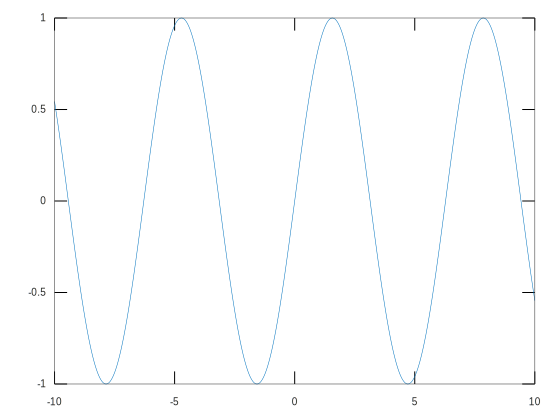

In [14]:
%%octave -f svg
graphics_toolkit('gnuplot');
plot(t,sin(t))

In [15]:
penguins_sample = MatlabMatrix(filename = 'MP_first_test_penguin_sample', matname = 'penguin_sample')
penguins_sample.load( numcol = 0, print_flag = True )


    _pyeval at line 57 column 30

float64


array([0.253906 , 0.259033 , 0.269287 , ..., 0.0559082, 0.064209 ,
       0.059082 ])

In [16]:
subsequence_len = 800
print(len(penguins_sample.data))

109842


In [17]:
penguins_sample.smooth(window_len = 10, print_flag = True)
octave.push('penguins_data', penguins_sample.data)
octave.push('subsequence_len', subsequence_len)

---> About to get out0
out0 ~ (109832,)
---> About to get start
r [1 3 5 7 9]
start [0.253906   0.260742   0.2637206  0.260777   0.25518111]
---> About to get stop
stop [0.06643338 0.0637207  0.06069336 0.05973307 0.059082  ]


/tmp/ipykernel_102/277727543.py:20: UserWarning: Window len must be odd! Adding 1 to your length.
  warnings.warn("Window len must be odd! Adding 1 to your length.")


In [18]:
%matplotlib inline

In [19]:
octave.register_graphics_toolkit('fltk')

In [ ]:
%%octave -f svg
graphics_toolkit('fltk');
[mp, p_index, motif_index, discord_index] = interactiveMatrixProfileVer3(
    penguins_data,
    subsequence_len
);

109842